In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

(-0.5, 426.5, 369.5, -0.5)

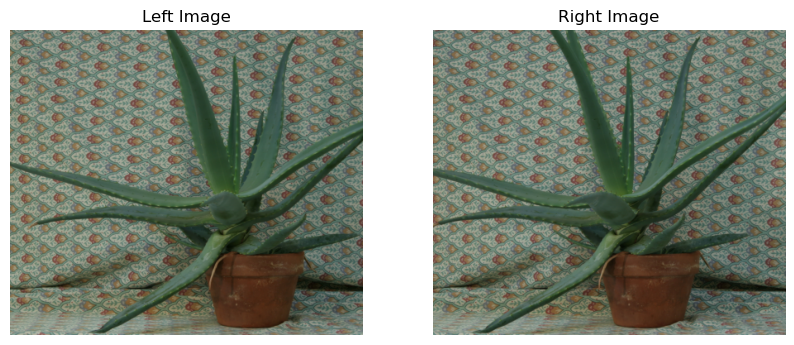

In [23]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 16

left = cv2.imread(left_img_path)
right = cv2.imread(right_img_path)

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(left, cv2.COLOR_BGR2RGB))
plt.title('Left Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(right, cv2.COLOR_BGR2RGB))
plt.title('Right Image')
plt.axis('off')


In [16]:
def l1_distance(x, y):
    return np.abs(x - y)

def l2_distance(x, y):
    return (x - y) ** 2

In [17]:
def window_based_matching_l1(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    left = cv2.imread(left_img, 0)
    right = cv2.imread(right_img, 0)

    left = left.astype(np.float32)
    right = right.astype(np.float32)

    height, width = left.shape[:2]

    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l1_distance(
                                int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale
    
    if save_result == True:
        print('Saving result...')
        cv2.imwrite(f'window_based_matching.png', depth)
        cv2.imwrite(f'window_based_matching_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')
    
    return depth

In [18]:
def window_based_matching_l2(left_img, right_img, disparity_range, kernel_size=5, save_result=True):
    left = cv2.imread(left_img, 0).astype(np.float32)
    right = cv2.imread(right_img, 0).astype(np.float32)

    height, width = left.shape[:2]

    depth = np.zeros((height, width), np.uint8)

    kernel_half = int((kernel_size - 1) / 2)
    scale = 3
    max_value = 255 * 9

    for y in range(kernel_half, height - kernel_half):
        for x in range(kernel_half, width - kernel_half):
            disparity = 0
            cost_min = 65534

            for j in range(disparity_range):
                total = 0
                value = 0

                for v in range(-kernel_half, kernel_half + 1):
                    for u in range(-kernel_half, kernel_half + 1):
                        value = max_value
                        if (x + u - j) >= 0:
                            value = l2_distance(
                                int(left[y + v, x + u]), int(right[y + v, (x + u) - j]))
                        total += value

                if total < cost_min:
                    cost_min = total
                    disparity = j

            depth[y, x] = disparity * scale
    
    if save_result == True:
        print('Saving result...')
        cv2.imwrite(f'window_based_matching.png', depth)
        cv2.imwrite(f'window_based_matching_color.png', cv2.applyColorMap(depth, cv2.COLORMAP_JET))

    print('Done')
    
    return depth

Saving result...
Done


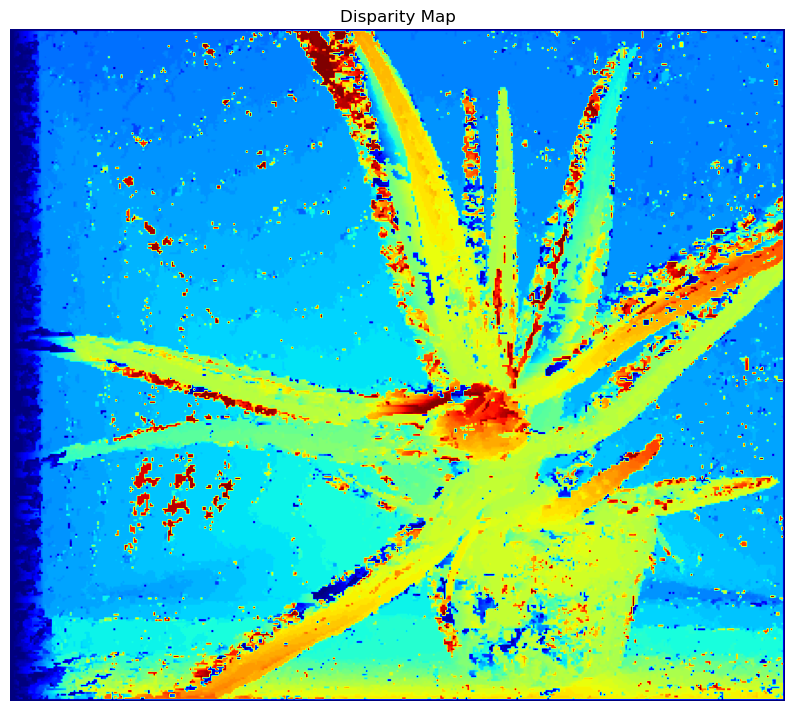

In [19]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result = window_based_matching_l1(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size=kernel_size ,
    save_result=True
)


plt.figure(figsize=(10, 10))
plt.imshow(window_based_result, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()


Saving result...
Done


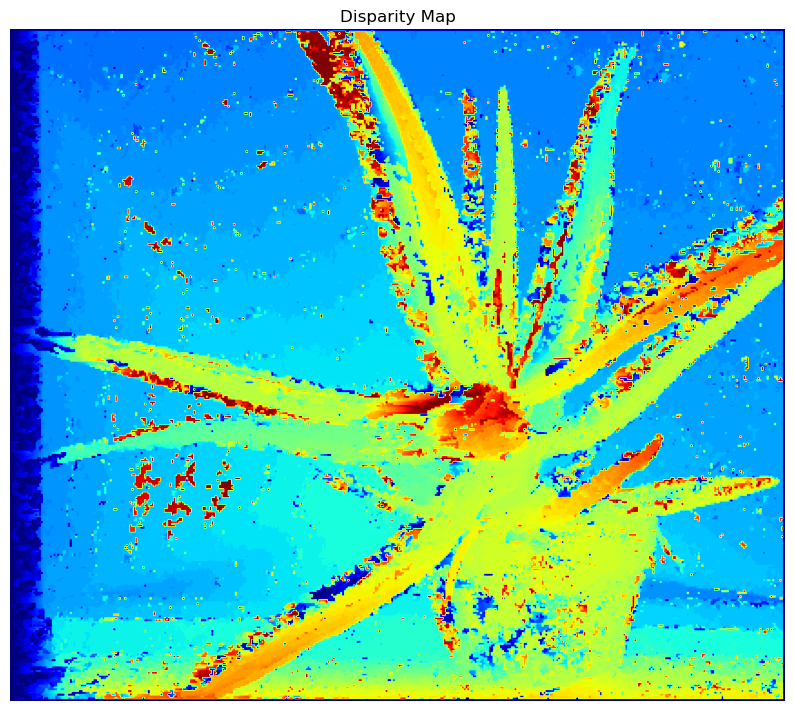

In [20]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 3

window_based_result = window_based_matching_l2(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size=kernel_size ,
    save_result=True
)

plt.figure(figsize=(10, 10))
plt.imshow(window_based_result, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()


Saving result...
Done


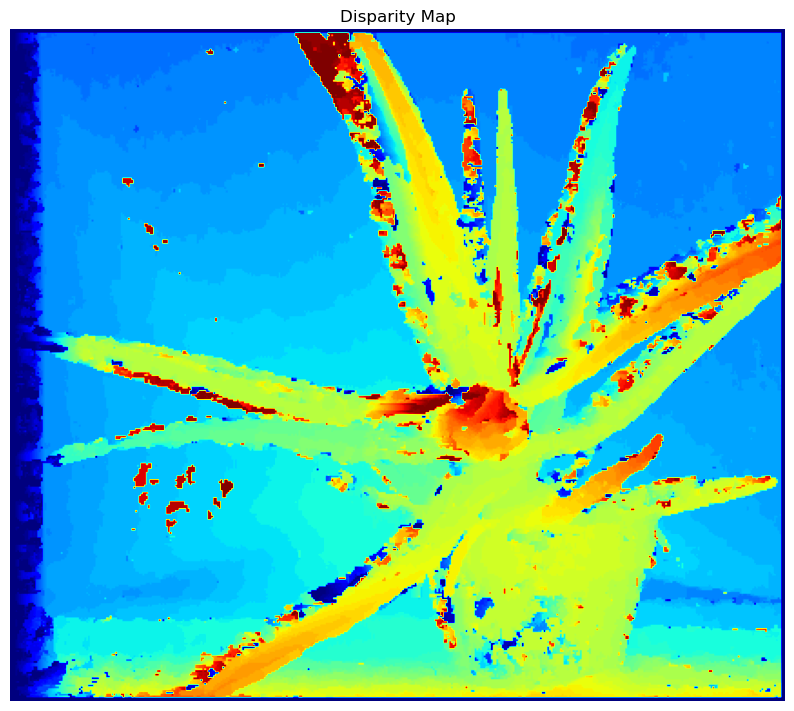

In [21]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 5

window_based_result = window_based_matching_l1(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size=kernel_size ,
    save_result=True
)


plt.figure(figsize=(10, 10))
plt.imshow(window_based_result, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()


Saving result...
Done


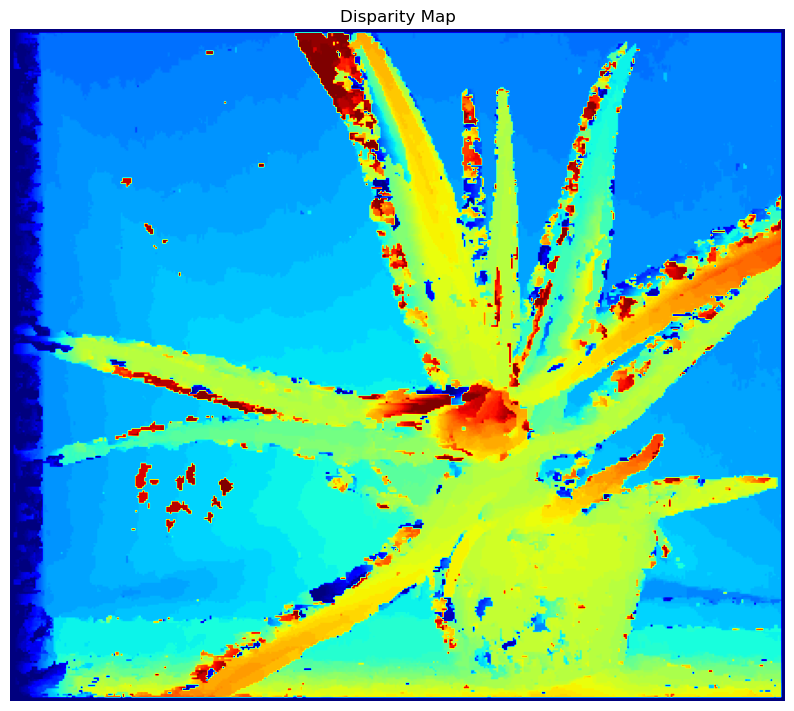

In [22]:
left_img_path = 'Aloe/Aloe_left_1.png'
right_img_path = 'Aloe/Aloe_right_1.png'
disparity_range = 64
kernel_size = 5

window_based_result = window_based_matching_l2(
    left_img_path ,
    right_img_path ,
    disparity_range ,
    kernel_size=kernel_size ,
    save_result=True
)

plt.figure(figsize=(10, 10))
plt.imshow(window_based_result, cmap='jet')
plt.title('Disparity Map')
plt.axis('off')
plt.show()
